# 1. Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
music_data = pd.read_csv('datasets/music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


# 2. Clean the data 

## Visualize data

In [3]:
music_data.head(5)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [4]:
music_data.tail(5)

,age,gender,genre
13,27,0,Acoustic
14,30,0,Acoustic
15,31,0,Classical
16,34,0,Classical
17,35,0,Classical


In [5]:
music_data.describe() # returns statistical table of numerical columns in the dataset

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [6]:
# finding class size
music_data.groupby('genre').count()

,age,gender
genre,,
Acoustic,3,3
Classical,6,6
Dance,3,3
HipHop,3,3
Jazz,3,3


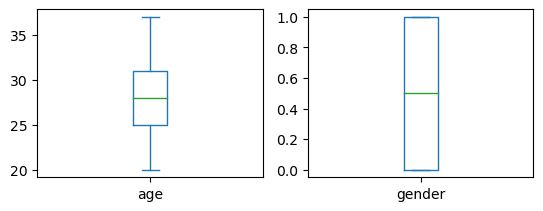

In [7]:
# Visualization - Univarient plot

music_data.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

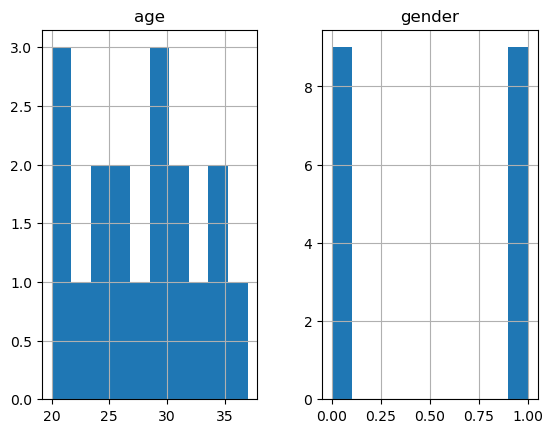

In [8]:
music_data.hist()
plt.show()

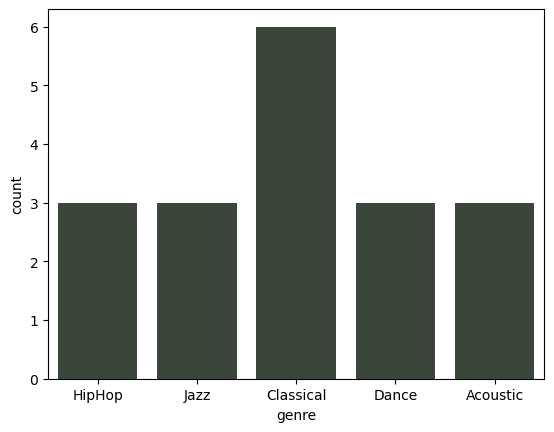

In [9]:
sns.countplot(x='genre',data=music_data, color='green', saturation=0.1)
plt.show()

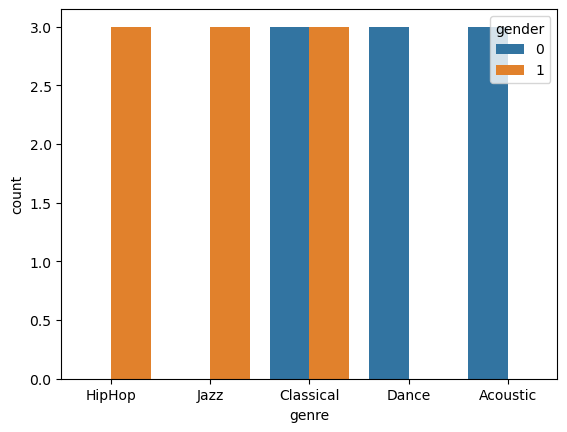

In [10]:
sns.countplot(x ='genre', hue = "gender", data = music_data)
plt.show()
# From the below visualization we can see that male(0) listens to hiphop, jazz and classical while 
# women(1) listens to dance accoustic and Classical

## We are using a cleaned dataset so there is no need to prepare the dataset or clean it.

# 3. Split data into Training Test sets

In [11]:
X = music_data.drop(columns='genre')
Y = music_data['genre']

In [12]:
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [13]:
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

# 4. Create a model

In [14]:
# Train Test Splt 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
model = DecisionTreeClassifier()

# 5. Train the model

In [16]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

# 6. Make Predictions

In [17]:
result = model.predict([[21,1], [22, 0]])

In [18]:
result

array(['HipHop', 'Dance'], dtype=object)

# 7. Evaluate and Improve

### Getting accuracy Score, Classification report and Confusion Matrix

In [19]:
predictions = model.predict(X_test)

In [20]:
score = accuracy_score(Y_test, y_pred=predictions)

In [21]:
score

1.0

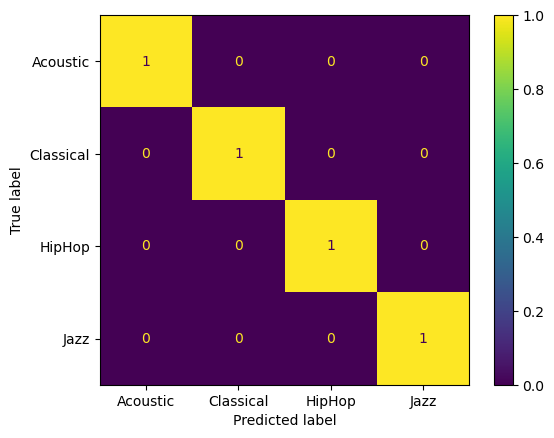

In [22]:
plot_confusion_matrix(model, X_test, Y_test)
plt.show()

In [24]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

    Acoustic       1.00      1.00      1.00         1
   Classical       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Saving model.

In [26]:
import joblib

In [27]:
joblib.dump(model, 'music-recomender.joblib')

['music-recomender.joblib']

## Getting a trained model

In [28]:
model = joblib.load('music-recomender.joblib')

## Predicting using the model

In [30]:
pred = model.predict([[21, 1]])
print(pred)

['HipHop']
